In [1]:
import pandas as pd
import pprint
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from nltk.corpus import stopwords 
import nltk
import csv
import numpy as np
import re
import emoji
from keras.models import Sequential
from keras.layers import Dense, Dropout
from nltk.stem.porter import *


Using TensorFlow backend.
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


##  pre-processing

In [2]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [3]:
stemmer = PorterStemmer()
tknzr = TweetTokenizer()
tokenizer = RegexpTokenizer(r'\w+')
#train = pd.read_csv("/Users/dileepjayamal/Documents/ML_clz/text_formatted.csv", error_bad_lines=False)
data = []
classes = []
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 


with open('../data/text_formatted.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        try:
            classes.append(int(row[1]))
        except:
            continue
        #print(row[2])
        #remove patterns
        text_vec = np.vectorize(remove_pattern)(row[2], "@[\w]*")
        row[2] = str(text_vec)
        
        #print(type(str(test_text)),str(test_text))
        
        #remove URL
        row[2] = re.sub(r'http\S+/', '', row[2])
        
        #Twitter tokanize
        word_tokens = tknzr.tokenize(row[2])
        word_tokens = [w for w in word_tokens if not w in stop_words and (w in emoji.UNICODE_EMOJI or (w.isalpha() and len(w)>3))] 
        
        #for i in range(len(word_tokens)):
        #    if word_tokens[i] in emoji.UNICODE_EMOJI:
        #        word_tokens[i] = emoji.demojize(word_tokens[i])
        
        #Regex torkanize
        regex_tokens = tokenizer.tokenize(row[2])
        regex_tokens = [w for w in regex_tokens if not w in stop_words and (len(w)> 3 or w in emoji.UNICODE_EMOJI) ]
        
    
        
        word_tokens = list(set().union(word_tokens,regex_tokens))
        
        # stemming
        for i in range(len(word_tokens)):
            word_tokens[i]=stemmer.stem(word_tokens[i])
        data.append(word_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dileepjayamal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
submission_test_set = []
with open('../data/test_formatted.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        try:
            row = row[1]
        except:
            continue
        text_vec = np.vectorize(remove_pattern)(row, "@[\w]*")
        row = str(text_vec)
        
        #print(type(str(test_text)),str(test_text))
        
        #remove URL
        row = re.sub(r'http\S+/', '', row)
        
        #Twitter tokanize
        word_tokens = tknzr.tokenize(row)
        word_tokens = [w for w in word_tokens if not w in stop_words and (w in emoji.UNICODE_EMOJI or (w.isalpha() and len(w)>3))] 
        
        #for i in range(len(word_tokens)):
        #    if word_tokens[i] in emoji.UNICODE_EMOJI:
        #        word_tokens[i] = emoji.demojize(word_tokens[i])
        
        #Regex torkanize
        regex_tokens = tokenizer.tokenize(row)
        regex_tokens = [w for w in regex_tokens if not w in stop_words and (len(w)> 3 or w in emoji.UNICODE_EMOJI) ]
        
    
        
        word_tokens = list(set().union(word_tokens,regex_tokens))
        
        # stemming
        for i in range(len(word_tokens)):
            word_tokens[i]=stemmer.stem(word_tokens[i])
        submission_test_set.append(word_tokens)


In [5]:
for each in data:
    print(each)

['just', 'imagin', 'noreligion', 'sweet', 'ironi', 'unit', 'fej2v3oubr', 'video', 'christma', 'time', 'nation']
['angel', 'noth', 'ask', 'escobar', 'talk', 'rumor', 'sarcasm', 'agent', 'hardli']
['nice', 'winter', 'minnesota', 'weather']
['left', 'episod', 'die']
['univers', 'yale', 'annual', 'list', 'releas', 'chosen', 'ironi', 'breath', 'year', 'quot', 'notabl', 'librarian']
['footi', 'pajama', 'elzgqsx2yq', 'never', 'elzgqsx']
['make', 'tree', 'see', 'noth', 'light', 'highway', 'light', 'get', 'christma', 'like', 'happier', 'break']
['night', 'beer', 'gonna', 'first', 'open', 'long']
['deserv', 'would', 'rice', 'think', 'support', 'daughter', 'knock']
['open', 'allow', 'christma']
[]
['instead']
['bloodi', 'upstair', 'get', 'chang', '😡']
['suffus', 'understand', 'cheek', 'tone', 'warmth', 'underli', 'pink', 'cold', 'textur', 'colour', 'differ']
['just', 'text', 'bill', 'great', 'arriv', 'mobil']
['interest', 'crush', 'realiz', 'great', 'sarcasm', 'never']
['insight', 'busgaglia', 'o

['lose', 'ligna', 'fight', 'trophi', 'prefer', 'derbi']
['zach', 'internetcelebr', 'harper', 'retweet', 'manual']
['tweet', 'thank', 'live', 'morn', 'sarcasm']
['look', 'hard', 'sarcasm']
['later', 'glisten', 'club', 'xring', 'found', 'xringmiracl', 'golf', 'ironi', 'green', 'creek', 'stfx', 'happi', '18th', 'lost']
['piss']
['love', 'song']
['music']
['test', 'love', 'come', 'school', 'know']
['long', 'along', 'wanna', 'want', 'qqqci3faxa', 'qqqci', 'meet', 'time', 'hello', 'time', 'long']
['free', 'caffein', 'coffe', 'yeah']
['insight', 'infam', 'need', 'partner', 'train', 'candid', 'knowledg', 'desper', 'within', 'appli']
['life', 'fallen', 'call', 'blackboard', 'alert', 'look', 'help', 'grade']
['glasgow', 'danger', 'tweet']
['final', 'fuck', 'amaz', 'learn']
['pleas', 'peopl', 'drive', 'drink']
['stomach', 'rare', 'drink']
['say', 'some', 'like', 'shit', 'dogg', 'snoop', 'chattin', 'look']
['thank', 'final', 'final', 'watch', 'chanc', 'great', 'season', 'doyl']
['peopl', 'help', '

##  

In [6]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
path = get_tmpfile("word2vec.model")
model = Word2Vec(data+submission_test_set, size=300, window=10, min_count=2, workers=10)
model.save("word2vec.model")
print(model)
print(len(model.wv.syn0))

Word2Vec(vocab=2757, size=300, alpha=0.025)
2757


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  import sys


In [7]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.vocab]
    return np.mean(word2vec_model[doc], axis=0)

In [8]:
x_transformed = []
y_transformed = []
test_transformed = []
missings = []
i=0
for node,_class in zip(data,classes):
    try:
        x_transformed.append(list(document_vector(model,node)))
        y_transformed.append(_class)
        i+=1
    except Exception as ex:
        pass
c=0
i=0
for node in submission_test_set:
    try:
        test_transformed.append(list(document_vector(model,node)))
        i+=1
    except Exception as ex:
        print(ex)
        print(i)
        missings.append(i)
        print(node)
        c+=1

print(len(x_transformed))
print(len(y_transformed))
print(len(test_transformed))
X = np.array(x_transformed+test_transformed)
print(c)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


need at least one array to concatenate
30
['pickanewsong', 'nooooooooooo', 'cantstandit']
need at least one array to concatenate
101
['trout']
need at least one array to concatenate
159
[]
need at least one array to concatenate
192
['biwk', 'phatsexyass', 'pork', 'picnic', 'biwk2vgwpx', 'tiffani']
need at least one array to concatenate
223
[]
need at least one array to concatenate
259
['dualist']
need at least one array to concatenate
297
['1bfosiwni5', 'clashupd']
need at least one array to concatenate
321
[]
need at least one array to concatenate
334
[]
need at least one array to concatenate
347
['thief']
need at least one array to concatenate
351
['rondo']
need at least one array to concatenate
354
[]
need at least one array to concatenate
377
[]
need at least one array to concatenate
510
[]
need at least one array to concatenate
560
[]
need at least one array to concatenate
633
['immens']
need at least one array to concatenate
667
['mahathir']
need at least one array to concatenate

In [9]:
len(X[:][0])

300

##  Dimensionality reduction

In [10]:
from sklearn.manifold import TSNE
print(X.shape)
tnse = TSNE()
result_tnse = tnse.fit_transform(X)
print(result_tnse.shape)
print(result_tnse)
print(tnse)


(4451, 300)
(4451, 2)
[[ -1.7738411 -41.626755 ]
 [ 40.10813    -1.2482952]
 [-17.994421   42.169285 ]
 ...
 [-15.728086   40.8615   ]
 [ 29.971987  -26.668333 ]
 [ 14.905776   28.518515 ]]
TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)


In [11]:
from sklearn.decomposition import PCA
print(X.shape)
pca = PCA(n_components=32)
result_pca = pca.fit_transform(X)
print(result_pca)
print(pca)

(4451, 300)
[[ 4.8561599e-02  1.1881217e-03 -1.0823261e-03 ...  5.2483176e-04
   9.9988531e-05  4.8598854e-04]
 [ 1.5221655e-03 -1.8684822e-03  1.6520028e-04 ... -1.3312823e-03
  -3.3145340e-04  8.3364997e-05]
 [-5.3892747e-02 -2.1725289e-04 -9.9810735e-05 ...  2.2133328e-04
   1.9566825e-04 -4.6206178e-04]
 ...
 [-5.4677200e-02 -6.4755138e-04  2.2976910e-04 ... -9.6919313e-05
  -3.6067527e-04 -7.7215949e-04]
 [ 2.1208292e-02  2.1792823e-03 -1.5236132e-03 ... -1.6513749e-04
  -8.7851076e-04  7.6819444e-05]
 [-2.4429474e-02  3.0037123e-05 -3.0481350e-04 ...  6.7249720e-04
  -5.2930231e-05  8.0205215e-04]]
PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


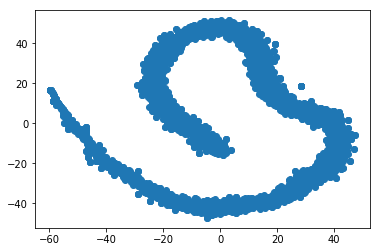

In [13]:
import matplotlib.pyplot as plt
plt.scatter(result_tnse[:, 0], result_tnse[:, 1])
plt.show()

## Seperate test set

In [14]:
print(len(y_transformed))
print(result_pca.shape)
test_pca = result_pca[len(y_transformed):]
test_tnse = result_tnse[len(y_transformed):]
print(test_pca)
test_set = np.concatenate((test_pca,test_tnse), axis=1)

result_pca = result_pca[:len(y_transformed)]
result_tnse = result_tnse[:len(y_transformed)]
print(result_tnse.shape)
print(result_pca.shape)
print(test_set.shape)

3687
(4451, 32)
[[-2.2827822e-03  4.7926002e-04 -7.8469724e-04 ...  2.3540945e-04
   3.5733086e-04 -6.1186455e-04]
 [-3.8032045e-03  1.1289545e-03 -1.1516213e-03 ... -1.2979063e-04
  -2.3342951e-04 -1.7488605e-04]
 [-3.6395062e-02  8.3526320e-05  2.0419376e-04 ... -8.2063564e-04
   8.9587970e-04 -1.0429546e-03]
 ...
 [-5.4677200e-02 -6.4755138e-04  2.2976910e-04 ... -9.6919313e-05
  -3.6067527e-04 -7.7215949e-04]
 [ 2.1208292e-02  2.1792823e-03 -1.5236132e-03 ... -1.6513749e-04
  -8.7851076e-04  7.6819444e-05]
 [-2.4429474e-02  3.0037123e-05 -3.0481350e-04 ...  6.7249720e-04
  -5.2930231e-05  8.0205215e-04]]
(3687, 2)
(3687, 32)
(764, 34)


# Divide the dataset into training and validation set


In [15]:
newdf1 = np.random.rand(len(result_pca)) < 0.8
#print(newdf1)
train_pca =result_pca[newdf1]
train_tnse = result_tnse[newdf1]

train = np.concatenate((train_pca,train_tnse), axis=1)
print(train.shape)
validation_pca = result_pca[~newdf1]
validation_tnse = result_tnse[~newdf1]
validation = np.concatenate((validation_pca,validation_tnse), axis=1)

y_transformed = np.array(y_transformed)
train_classes = y_transformed[newdf1]
validation_classes = y_transformed[~newdf1]

(2961, 34)


In [16]:
print(train.shape)

(2961, 34)


In [17]:
print(len(train))
print(len(validation))
print(len(train_classes))
print(len(validation_classes))

2961
726
2961
726


# SVC method


In [18]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel="linear")
clf.fit(train,train_classes)
clf.score(validation,validation_classes)

0.6515151515151515

# Naive Bayes


In [19]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train, train_classes)
print(clf.score(validation, validation_classes))

0.6818181818181818


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_depth=6,random_state=1)
clf.fit(train, train_classes)
print(clf.score(validation, validation_classes))

0.7327823691460055


In [21]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier().fit(train, train_classes)
print(clf.score(validation,validation_classes))

0.5385674931129476


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [22]:
print(test_set.shape)
rs = clf.predict(test_set)

(764, 34)


In [23]:
results_set = list(rs)
results =[]
l=0
for i in range(len(missings)):
    results +=results_set[l:missings[i]]+[1]
    l=missings[i]
results+=results_set[l:]
print(len(results))
print(results)

784
[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [24]:
import csv
with open('../results/rs.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['Index','Label'])
    for i in range(len(results)):
        writer.writerow([i+1,results[i]])


## Deep NN method


In [25]:
from keras import regularizers
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))

model.add(Dense(256, activation='elu',kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))
model.add(Dense(256, activation='elu',kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))
model.add(Dense(16, activation='elu',kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))
model.add(Dense(8, activation='elu',kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))
model.add(Dense(1, activation='sigmoid'))


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




In [27]:
from keras.callbacks import LearningRateScheduler
import math
initial_lrate = 0.0001
start_ephocs = 0
def exp_decay(epoch):
    global initial_lrate, start_ephocs
    epoch += start_ephocs 
    k = 0.1
    lrate = initial_lrate * math.exp(-k*epoch)
    print(lrate)
    return lrate

lrate = LearningRateScheduler(exp_decay)
callbacks_list = [lrate]

In [28]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='../models/weights.hdf5', verbose=1, monitor='val_loss', save_best_only=True)

In [29]:
history = model.fit(train, train_classes, epochs=100, batch_size=10, callbacks=[checkpointer,lrate], validation_data=(validation, validation_classes))


Train on 2961 samples, validate on 726 samples
Epoch 1/100
0.0001
2961/2961 [==============================] - 1s 447us/step - loss: 1.1111 - acc: 0.6180 - val_loss: 1.0076 - val_acc: 0.6460

Epoch 00001: val_loss improved from inf to 1.00756, saving model to ../models/weights.hdf5
Epoch 2/100
9.048374180359596e-05
2961/2961 [==============================] - 1s 235us/step - loss: 0.9527 - acc: 0.6454 - val_loss: 0.9004 - val_acc: 0.6612

Epoch 00002: val_loss improved from 1.00756 to 0.90045, saving model to ../models/weights.hdf5
Epoch 3/100
8.187307530779819e-05
2961/2961 [==============================] - 1s 274us/step - loss: 0.8793 - acc: 0.6427 - val_loss: 0.8438 - val_acc: 0.6543

Epoch 00003: val_loss improved from 0.90045 to 0.84381, saving model to ../models/weights.hdf5
Epoch 4/100
7.408182206817179e-05
2961/2961 [==============================] - 1s 259us/step - loss: 0.8301 - acc: 0.6559 - val_loss: 0.8106 - val_acc: 0.6488

Epoch 00004: val_loss improved from 0.84381 to 

2961/2961 [==============================] - 1s 252us/step - loss: 0.6988 - acc: 0.6619 - val_loss: 0.6997 - val_acc: 0.6625

Epoch 00033: val_loss improved from 0.70000 to 0.69973, saving model to ../models/weights.hdf5
Epoch 34/100
3.6883167401239998e-06
2961/2961 [==============================] - 1s 239us/step - loss: 0.6986 - acc: 0.6636 - val_loss: 0.6995 - val_acc: 0.6612

Epoch 00034: val_loss improved from 0.69973 to 0.69954, saving model to ../models/weights.hdf5
Epoch 35/100
3.337326996032607e-06
2961/2961 [==============================] - 1s 255us/step - loss: 0.6983 - acc: 0.6616 - val_loss: 0.6993 - val_acc: 0.6612

Epoch 00035: val_loss improved from 0.69954 to 0.69925, saving model to ../models/weights.hdf5
Epoch 36/100
3.0197383422318503e-06
2961/2961 [==============================] - 1s 261us/step - loss: 0.6981 - acc: 0.6616 - val_loss: 0.6991 - val_acc: 0.6612

Epoch 00036: val_loss improved from 0.69925 to 0.69915, saving model to ../models/weights.hdf5
Epoch 37/


Epoch 00097: val_loss improved from 0.69775 to 0.69775, saving model to ../models/weights.hdf5
Epoch 98/100
6.1283495053222026e-09
2961/2961 [==============================] - 1s 292us/step - loss: 0.6962 - acc: 0.6643 - val_loss: 0.6977 - val_acc: 0.6653

Epoch 00098: val_loss improved from 0.69775 to 0.69775, saving model to ../models/weights.hdf5
Epoch 99/100
5.5451599432176946e-09
2961/2961 [==============================] - 1s 254us/step - loss: 0.6962 - acc: 0.6643 - val_loss: 0.6977 - val_acc: 0.6653

Epoch 00099: val_loss did not improve from 0.69775
Epoch 100/100
5.017468205617528e-09
2961/2961 [==============================] - 1s 225us/step - loss: 0.6962 - acc: 0.6643 - val_loss: 0.6977 - val_acc: 0.6653

Epoch 00100: val_loss improved from 0.69775 to 0.69775, saving model to ../models/weights.hdf5


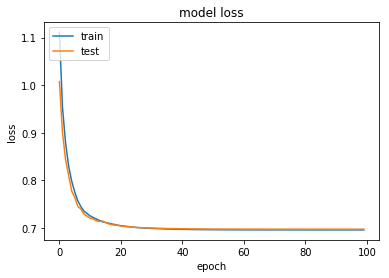

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [34]:
#preds = model.predict(test)
#_loss, _acc =model.evaluate(validation, validation_classes, batch_size=10)
#print(_loss)
#print(_acc)

NameError: name 'test' is not defined

In [ ]:
#from autocorrect import spell

#print(spell('tast'))